/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


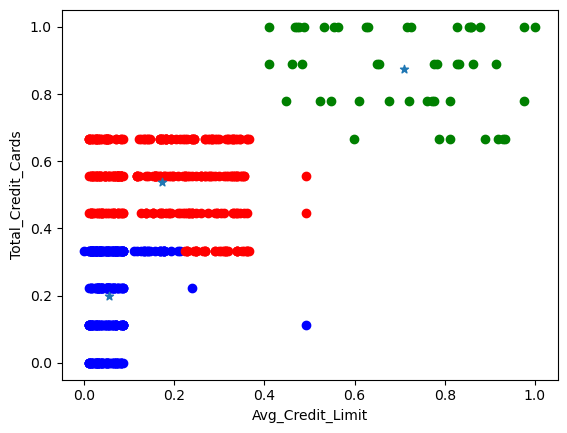

In [1]:
# Write a Python program that reads the Credit Card Customer Data.csv.The  following  are  the  tasks  that  need  to  be consideredwhile constructing  the  solution  to  Segregate  customers  based  on  the  data  provided with the help of k-means clustering.
 
# 1.Load the Given CSV file into a DataFrame
 
# 2.Find missing values(impute) and drop the unnecessary columns
 
# 3.Univariate and bivariate analysis (EDA) (convey some relevant info about the data) (mention the info/ insights)
 
# 4.Standardize the whole dataset (scaling )
 
# 5.Find the within-cluster sum of square   (WCSS)
 
# 6.Use  a  line  plot  using  matplotlib  to  find  scores  for  different  sizes  of  K  and choose the best size for the cluster and build the final model  (elbow plot)
 
# 8.Observe Cluster behavior with different columns. (K means)
 
# 9.Print Co-ordinates of all centroids

from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# minmax=MinMaxScaler()

df=pd.read_csv("Credit-Card-Customer-Data.csv")
df.head()

minmax=MinMaxScaler()
transformed= minmax.fit_transform(df[["Avg_Credit_Limit", "Total_Credit_Cards"]])
transformed
df["Avg_Credit_Limit"] = transformed[:,0]
df["Total_Credit_Cards"] = transformed[:,1]
df

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[["Avg_Credit_Limit", "Total_Credit_Cards"]])

predicted=kmeans.predict(df[["Avg_Credit_Limit", "Total_Credit_Cards"]])
predicted

df["clusters"] = predicted
df

kmeans.cluster_centers_

c1=df[df.clusters==0]
c2=df[df.clusters==1]
c3=df[df.clusters==2]
plt.scatter(c1["Avg_Credit_Limit"], c1["Total_Credit_Cards"], color="blue")
plt.scatter(c2["Avg_Credit_Limit"], c2["Total_Credit_Cards"], color="red")
plt.scatter(c3["Avg_Credit_Limit"], c3["Total_Credit_Cards"], color="green")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="*")
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.show()

/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mordhwaj/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

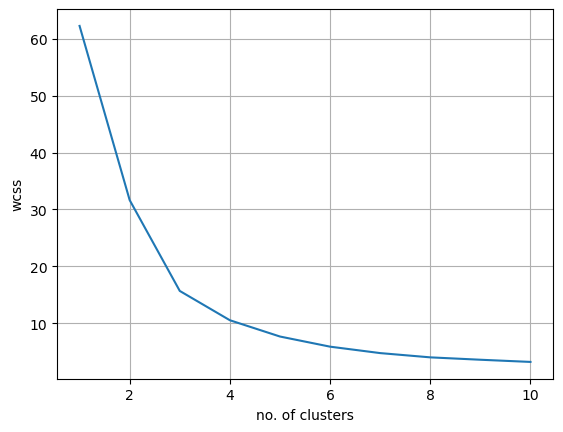

In [2]:
inertias=[]
kmeans.inertia_ #no of cluster 3

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df[["Avg_Credit_Limit", "Total_Credit_Cards"]])
    inertias.append(km.inertia_)
inertias

plt.plot(range(1,11), inertias)
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()